## Source

[Charlie Harper, "Visualizing Data with Bokeh and Pandas," Programming Historian 7 (2018), https://doi.org/10.46430/phen0081](https://programminghistorian.org/en/lessons/visualizing-with-bokeh)

## Reflection
TODO

## Code

## Getting Started

In [ ]:
# installing packages
pip install pandas bokeh pyproj
pip install "pandas>=1.2.0,<1.2.3" "bokeh>=2.0.0,<2.3.0" "pyproj>=3.0,<3.0.1"

## Example Plot

In [3]:
# my_first_plot.py
from bokeh.plotting import figure, output_file, show
output_file('my_first_graph.html')

In [4]:
# creating data to plot
x = [1, 3, 5, 7]
y = [2, 4, 6, 8]

In [6]:
# adding data to instantiated figure
p = figure()

p.circle(x, y, size=10, color='red', legend_label='circle')
p.line(x, y, color='blue', legend_label='line')
p.triangle(y, x, color='gold', size=10, legend_label='triangle')

GlyphRenderer(id='1153', ...)

In [7]:
# styling
p.legend.click_policy='hide'
show(p)

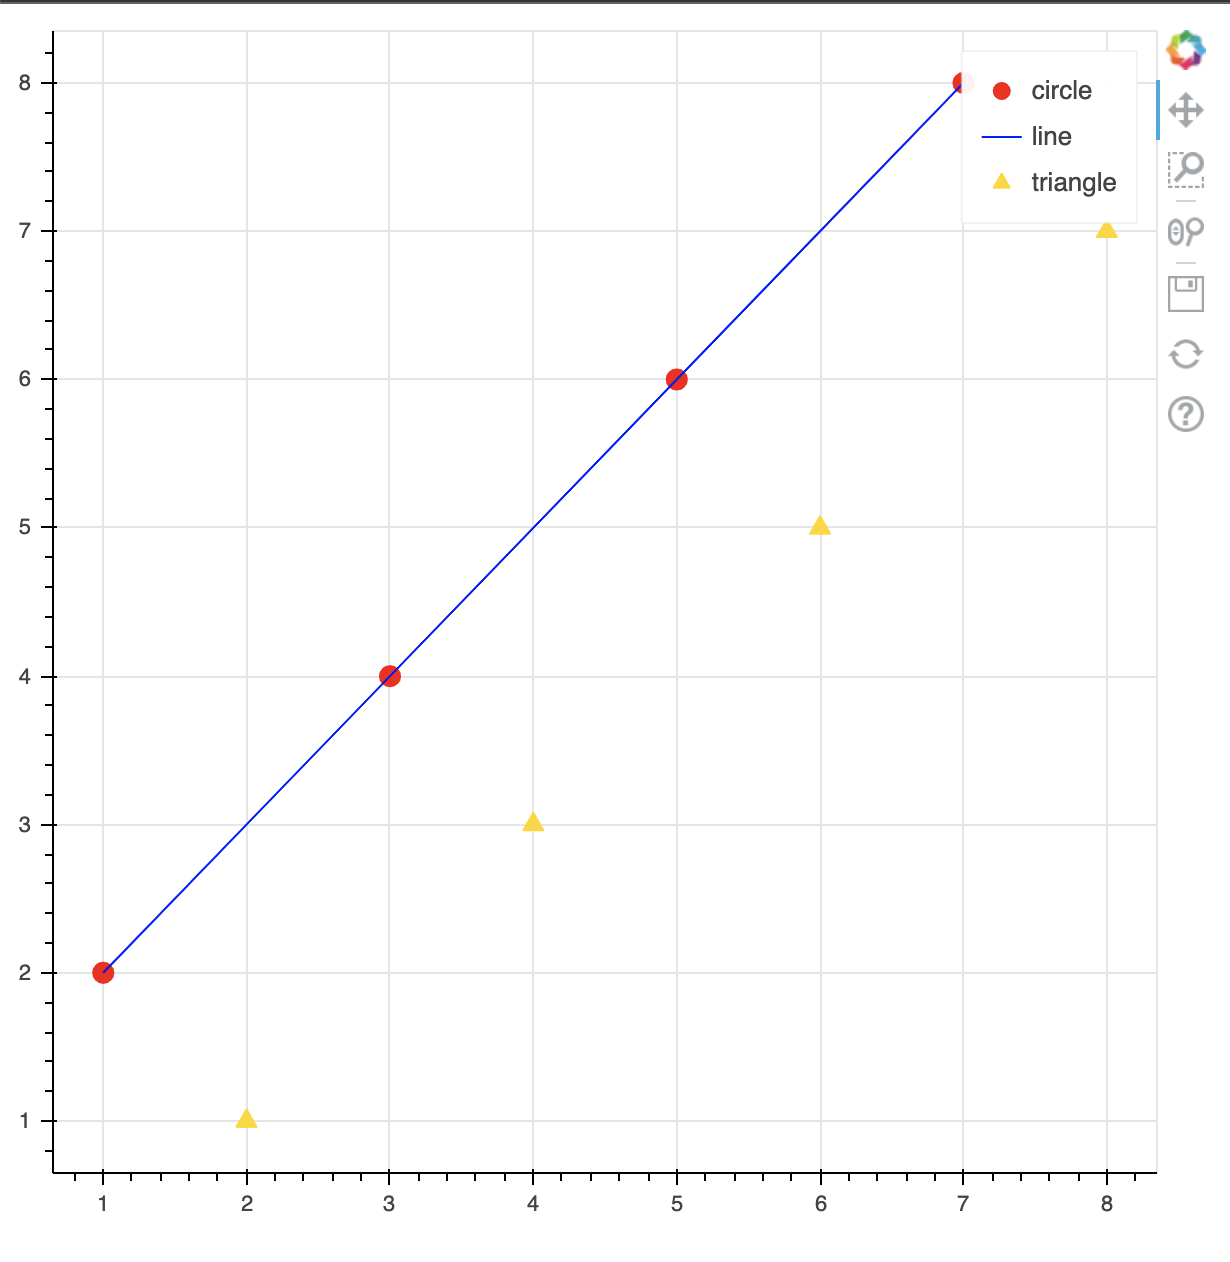

## Exploring the WWII THOR Dataset

In [13]:
# loading data in pandas
import pandas as pd

url = 'https://raw.githubusercontent.com/programminghistorian/ph-submissions/gh-pages/assets/visualizing-with-bokeh/thor_wwii.csv'
df = pd.read_csv(url)
print(df)

           MSNDATE      THEATER COUNTRY_FLYING_MISSION    NAF   UNIT_ID  \
0       03/30/1941          ETO          GREAT BRITAIN    RAF   84 SQDN   
1       11/24/1940          ETO          GREAT BRITAIN    RAF  211 SQDN   
2       12/04/1940          ETO          GREAT BRITAIN    RAF  211 SQDN   
3       12/31/1940          ETO          GREAT BRITAIN    RAF  211 SQDN   
4       01/06/1941          ETO          GREAT BRITAIN    RAF  211 SQDN   
...            ...          ...                    ...    ...       ...   
178276  08/01/1945          PTO                    USA  20 AF     73 BW   
178277  07/22/1942          MTO          GREAT BRITAIN    RAF       NaN   
178278  08/17/1940  EAST AFRICA          GREAT BRITAIN    RAF   47 SQDN   
178279  08/06/1945          PTO                    USA  20 AF    509 CG   
178280  08/09/1945          PTO                    USA  20 AF    509 CG   

       AIRCRAFT_NAME  AC_ATTACKING TAKEOFF_BASE TAKEOFF_COUNTRY  \
0           BLENHEIM          10

In [14]:
df.columns.tolist()

['MSNDATE',
 'THEATER',
 'COUNTRY_FLYING_MISSION',
 'NAF',
 'UNIT_ID',
 'AIRCRAFT_NAME',
 'AC_ATTACKING',
 'TAKEOFF_BASE',
 'TAKEOFF_COUNTRY',
 'TAKEOFF_LATITUDE',
 'TAKEOFF_LONGITUDE',
 'TGT_COUNTRY',
 'TGT_LOCATION',
 'TGT_LATITUDE',
 'TGT_LONGITUDE',
 'TONS_HE',
 'TONS_IC',
 'TONS_FRAG',
 'TOTAL_TONS']

## Visualizing the Data (Scatterplot Graph)

In [15]:
# creating a scatter plot
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

output_file('columndatasource_example.html')

df = pd.read_csv(url)

In [16]:
# load csv into dataframe
sample = df.sample(50)
source = ColumnDataSource(sample)

In [17]:
# create figure object and plot data
p = figure()
p.circle(x='TOTAL_TONS', y='AC_ATTACKING',
         source=source,
         size=10, color='green')

GlyphRenderer(id='1337', ...)

In [18]:
# add title and label axes
p.title.text = 'Attacking Aircraft and Munitions Dropped'
p.xaxis.axis_label = 'Tons of Munitions Dropped'
p.yaxis.axis_label = 'Number of Attacking Aircraft'

In [19]:
# add interactive hovering element
hover = HoverTool()
hover.tooltips=[
    ('Attack Date', '@MSNDATE'),
    ('Attacking Aircraft', '@AC_ATTACKING'),
    ('Tons of Munitions', '@TOTAL_TONS'),
    ('Type of Aircraft', '@AIRCRAFT_NAME')
]

p.add_tools(hover)

show(p)

 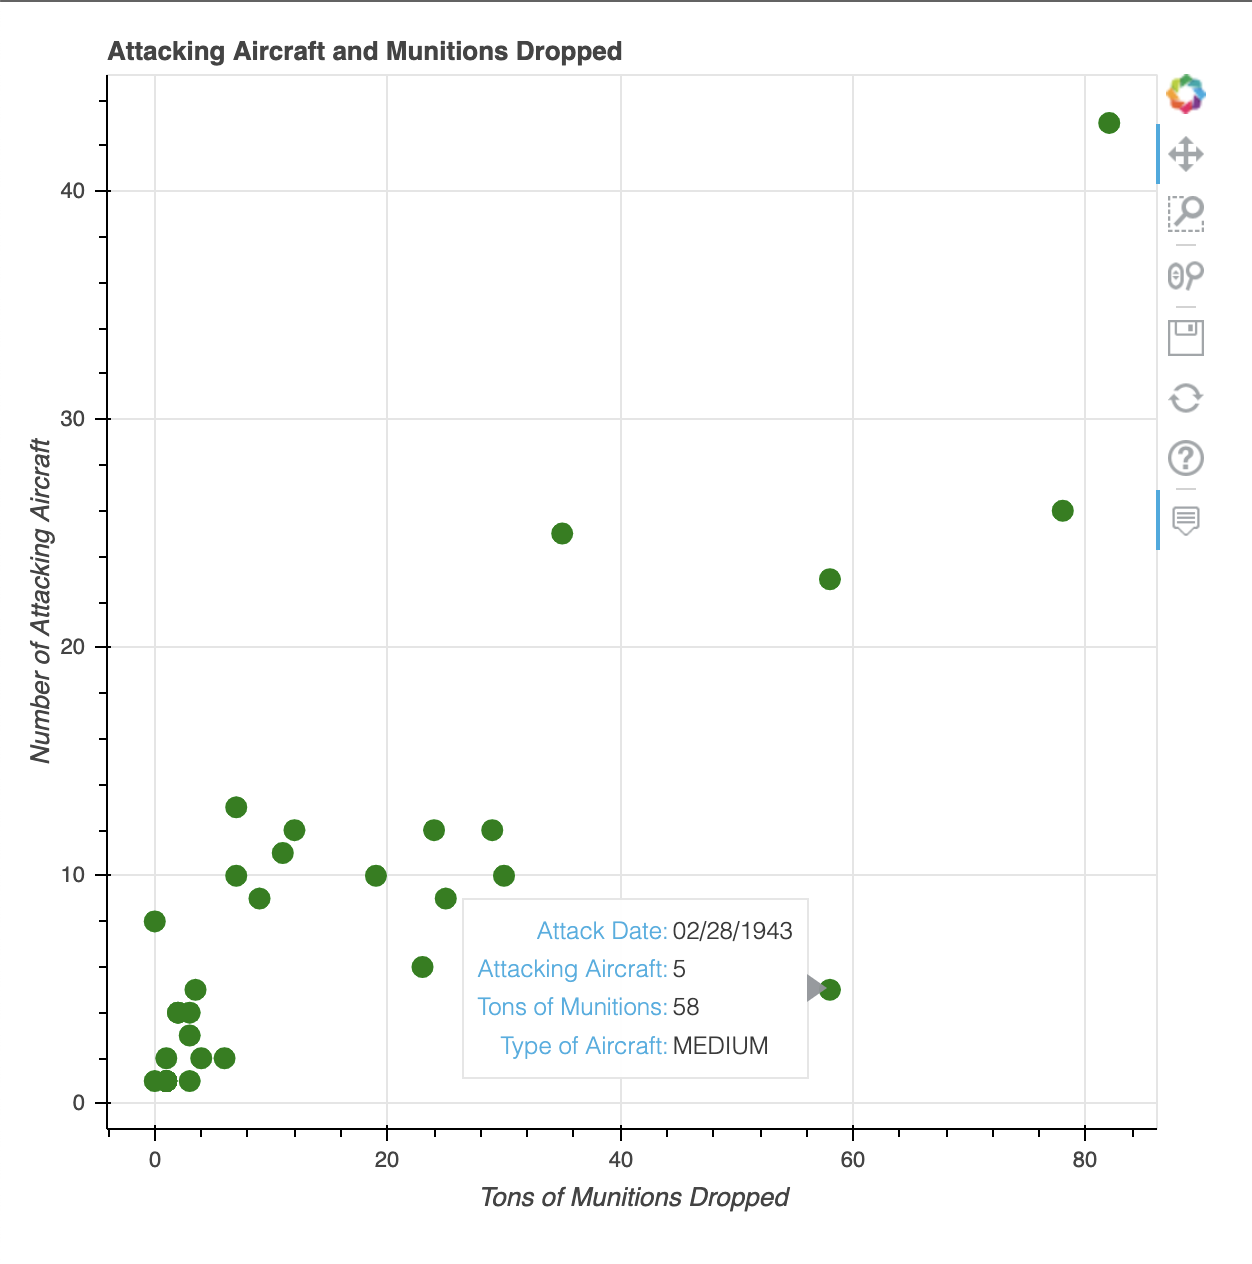

## Visualizing the Data (Categorical Data and Bar Charts)

In [21]:
# munitions_by_country.py
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_file('munitions_by_country.html')

df = pd.read_csv(url)

In [22]:
# using groupby dataframe method
grouped = df.groupby('COUNTRY_FLYING_MISSION')[['TOTAL_TONS', 'TONS_HE', 'TONS_IC', 'TONS_FRAG']].sum()

In [23]:
# printing out data
print(grouped)

                        TOTAL_TONS     TONS_HE     TONS_IC  TONS_FRAG
COUNTRY_FLYING_MISSION                                               
AUSTRALIA                   479.89      453.90      13.600      18.64
GREAT BRITAIN           1112598.95   868277.23  209036.158    1208.00
NEW ZEALAND                2629.06     4263.70     166.500       0.00
SOUTH AFRICA                 11.69       15.00       0.000       0.00
USA                     1625487.68  1297955.65  205288.200  127655.98


## Plot Data

In [24]:
# convert to kilotons
grouped = grouped / 1000

In [25]:
# create a ColumnDataSource from grouped data and create a figure
source = ColumnDataSource(grouped)
countries = source.data['COUNTRY_FLYING_MISSION'].tolist()
p = figure(x_range=countries)

In [26]:
# add title and label axes
color_map = factor_cmap(field_name='COUNTRY_FLYING_MISSION',
                    palette=Spectral5, factors=countries)

p.vbar(x='COUNTRY_FLYING_MISSION', top='TOTAL_TONS', source=source, width=0.70, color=color_map)

p.title.text ='Munitions Dropped by Allied Country'
p.xaxis.axis_label = 'Country'
p.yaxis.axis_label = 'Kilotons of Munitions'

In [27]:
# add interactive hovering element
hover = HoverTool()
hover.tooltips = [
    ("Totals", "@TONS_HE High Explosive / @TONS_IC Incendiary / @TONS_FRAG Fragmentation")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

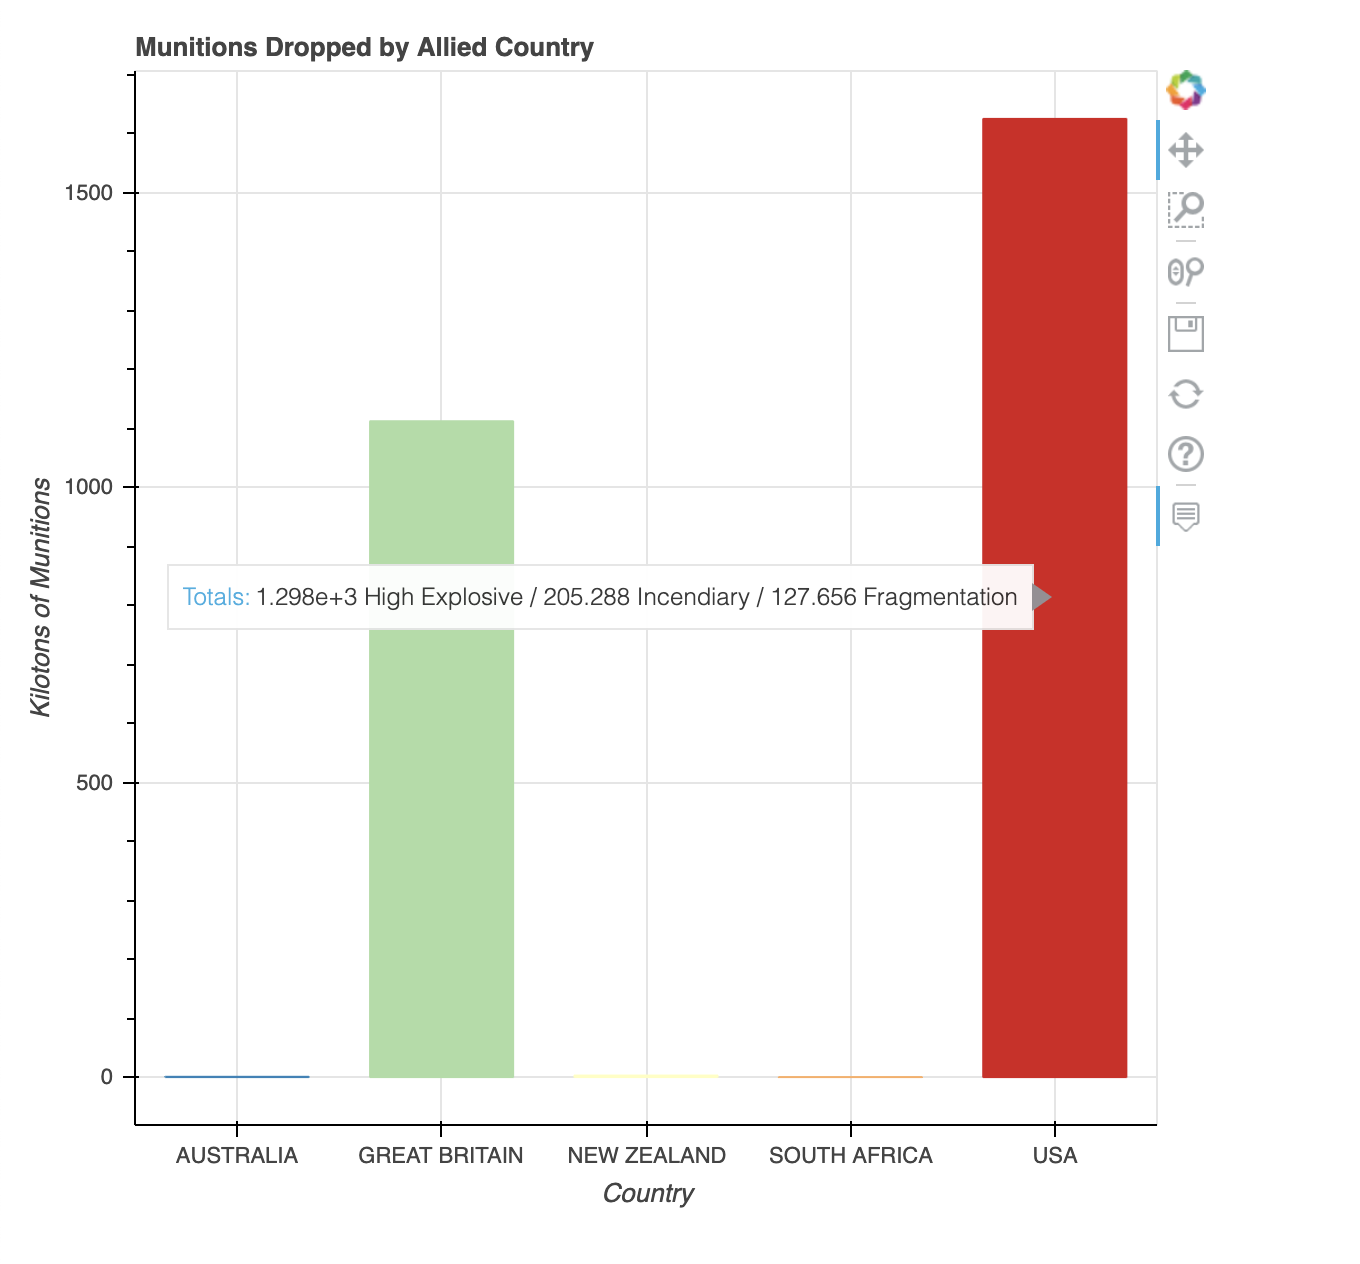

## Visualizing the Data (Stacked Bar Charts and Sub-sampling Data)

In [35]:
# munitions_by_country_stacked.py
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3
output_file('types_of_munitions.html')

df = pd.read_csv(url)

In [36]:
# filter data
filter = df['COUNTRY_FLYING_MISSION'].isin(('USA','GREAT BRITAIN'))
df = df[filter]

In [37]:
# using groupby dataframe method
grouped = df.groupby('COUNTRY_FLYING_MISSION')['TONS_IC', 'TONS_FRAG', 'TONS_HE'].sum()

#convert tons to kilotons again
grouped = grouped / 1000

/var/folders/27/1zf2qqwd3j3g30sfhj13kzyh0000gp/T/ipykernel_2494/3121886858.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('COUNTRY_FLYING_MISSION')['TONS_IC', 'TONS_FRAG', 'TONS_HE'].sum()


In [39]:
# create a ColumnDataSource from grouped data
source = ColumnDataSource(grouped)
countries = source.data['COUNTRY_FLYING_MISSION'].tolist()
p = figure(x_range=countries)

In [40]:
# create stacked bar chart
p.vbar_stack(stackers=['TONS_HE', 'TONS_FRAG', 'TONS_IC'],
             x='COUNTRY_FLYING_MISSION', source=source,
             legend = ['High Explosive', 'Fragmentation', 'Incendiary'],
             width=0.5, color=Spectral3)

[GlyphRenderer(id='1637', ...),
 GlyphRenderer(id='1653', ...),
 GlyphRenderer(id='1668', ...)]

In [41]:
# add title and label axes
p.title.text ='Types of Munitions Dropped by Allied Country'
p.legend.location = 'top_left'

p.xaxis.axis_label = 'Country'
p.xgrid.grid_line_color = None	#remove the x grid lines

p.yaxis.axis_label = 'Kilotons of Munitions'

show(p)

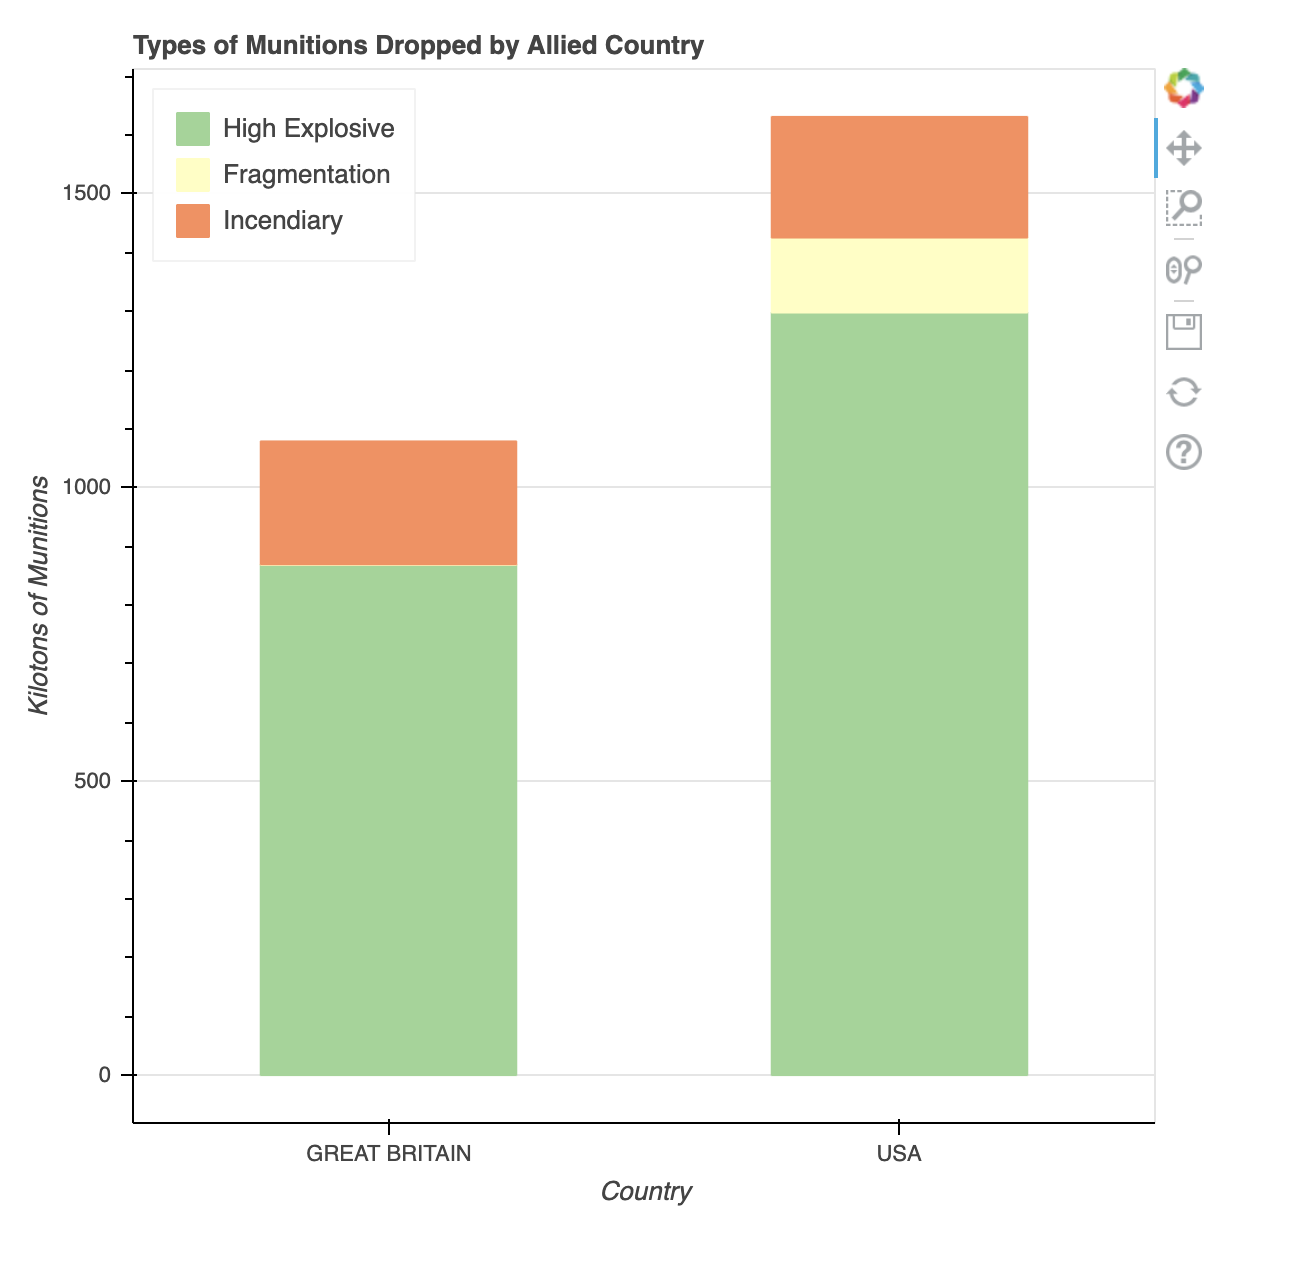

## Visualizing the Data (Time-Series and Annotations)

In [43]:
# my_first_timeseries.py
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3
output_file('simple_timeseries_plot.html')

df = pd.read_csv(url)

#make sure MSNDATE is a datetime format
df['MSNDATE'] = pd.to_datetime(df['MSNDATE'], format='%m/%d/%Y')

grouped = df.groupby('MSNDATE')['TOTAL_TONS', 'TONS_IC', 'TONS_FRAG'].sum()
grouped = grouped/1000

source = ColumnDataSource(grouped)

p = figure(x_axis_type='datetime')

p.line(x='MSNDATE', y='TOTAL_TONS', line_width=2, source=source, legend='All Munitions')
p.line(x='MSNDATE', y='TONS_FRAG', line_width=2, source=source, color=Spectral3[1], legend='Fragmentation')
p.line(x='MSNDATE', y='TONS_IC', line_width=2, source=source, color=Spectral3[2], legend='Incendiary')

p.yaxis.axis_label = 'Kilotons of Munitions Dropped'

show(p)

/var/folders/27/1zf2qqwd3j3g30sfhj13kzyh0000gp/T/ipykernel_2494/3427792604.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('MSNDATE')['TOTAL_TONS', 'TONS_IC', 'TONS_FRAG'].sum()


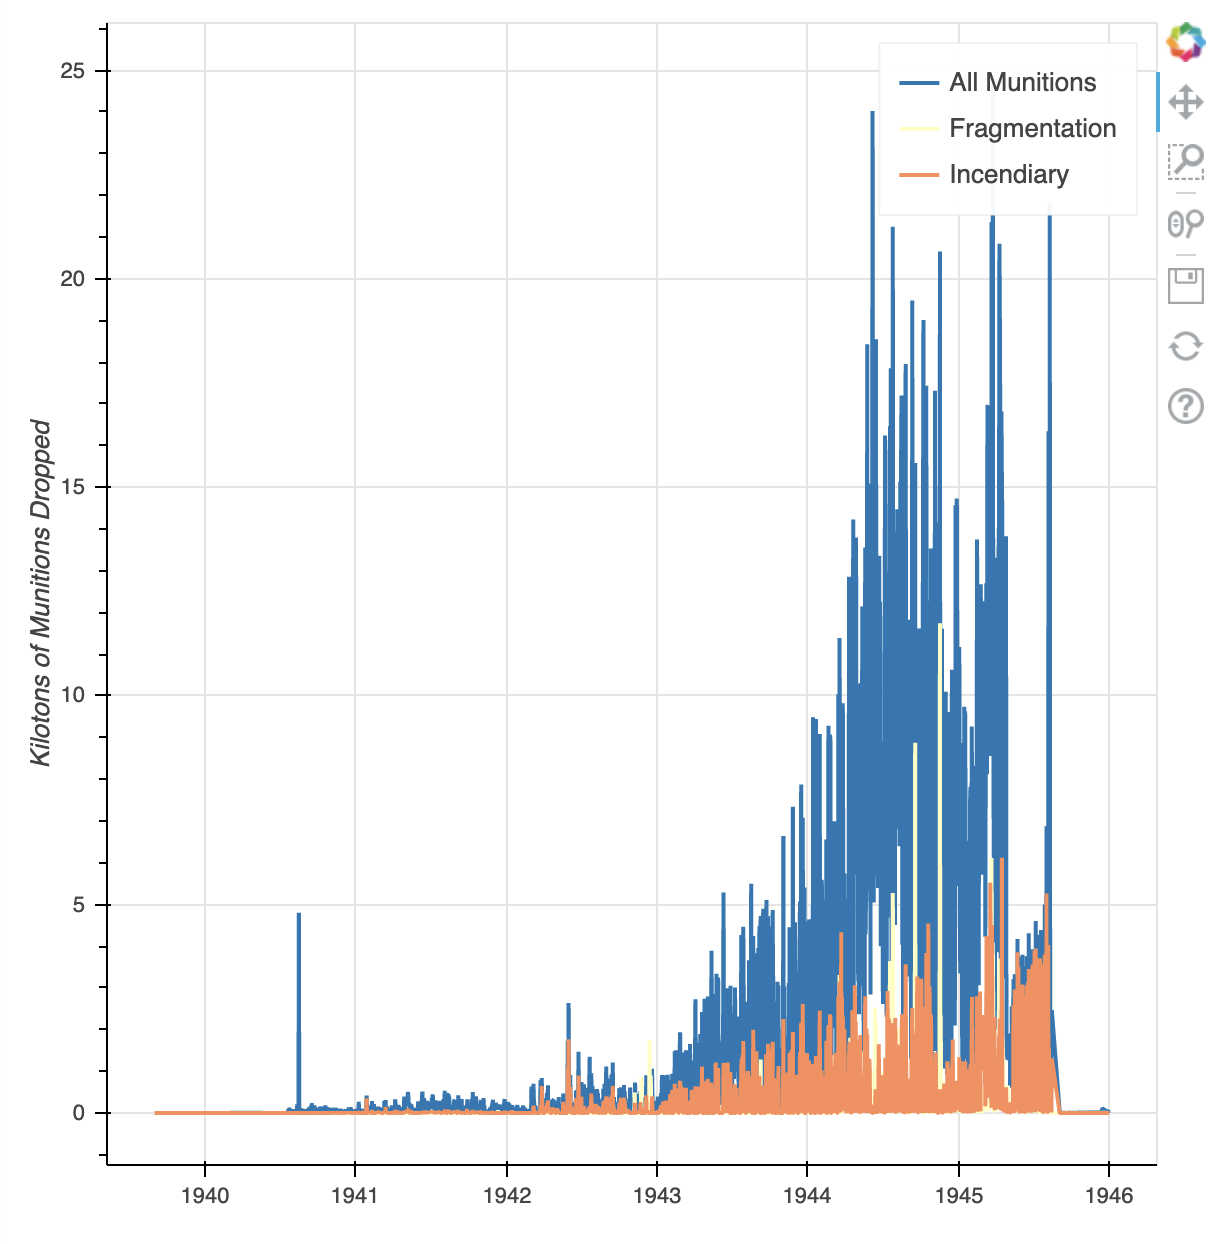

## Resampling Time-Series Data

In [44]:
# update grouper then re-run code above
grouped = df.groupby(pd.Grouper(key='MSNDATE', freq='M'))['TOTAL_TONS', 'TONS_IC', 'TONS_FRAG'].sum()

/var/folders/27/1zf2qqwd3j3g30sfhj13kzyh0000gp/T/ipykernel_2494/1362967227.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby(pd.Grouper(key='MSNDATE', freq='M'))['TOTAL_TONS', 'TONS_IC', 'TONS_FRAG'].sum()


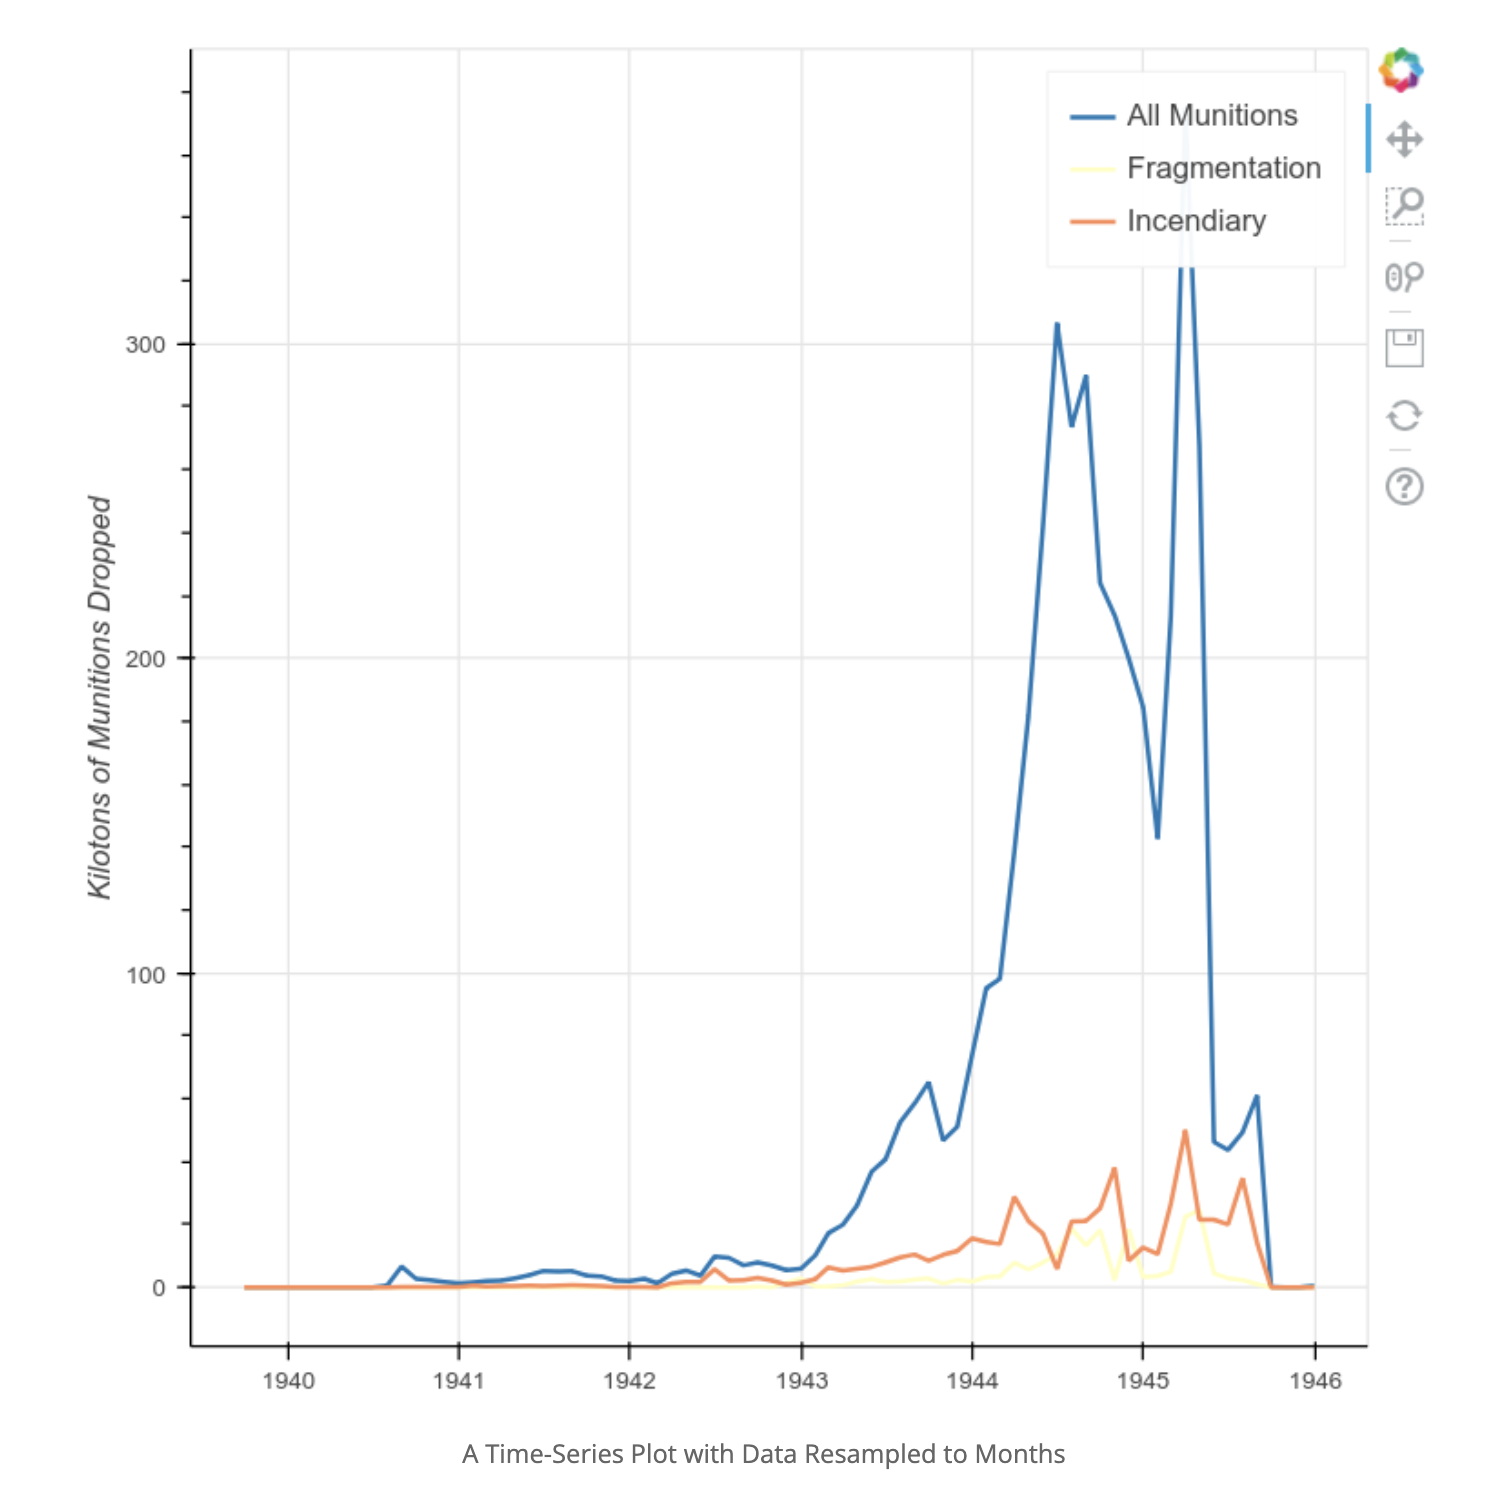

## Annotating Trends in Plots

In [55]:
# import BoxAnnotation
from bokeh.models import BoxAnnotation

In [56]:
# create a BoxAnnotation
box_left = pd.to_datetime('6-6-1944')
box_right = pd.to_datetime('16-12-1944')
                           
box = BoxAnnotation(left=box_left, right=box_right,
                    line_width=1, line_color='black', line_dash='dashed',
                    fill_alpha=0.2, fill_color='orange')

p.add_layout(box)
show(p)

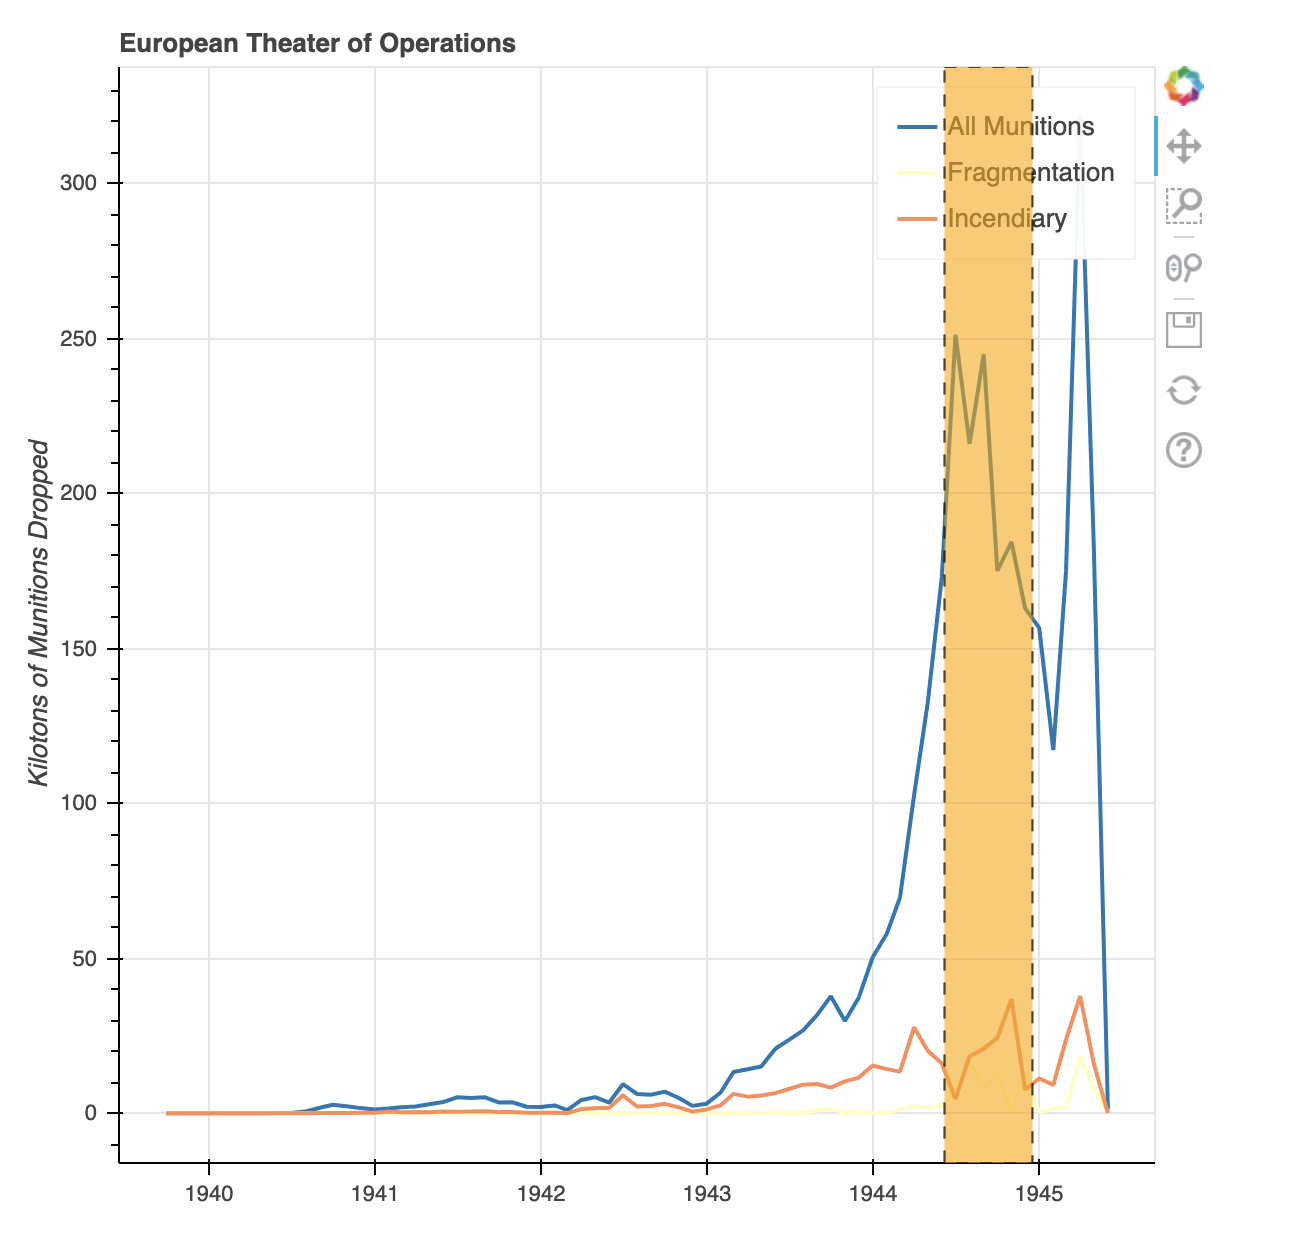

## Spatial Data: Mapping Target Locations

In [ ]:
# target_locations.py
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import layout
from bokeh.palettes import Spectral3
from bokeh.tile_providers import get_provider
from pyproj import Transformer
output_file('mapping_targets.html')

# helper function to convert lat/long to easting/northing for mapping
# this relies on functions from the pyproj library


def LongLat_to_EN(long, lat):
    try:
        transformer = Transformer.from_crs('epsg:4326', 'epsg:3857')
        easting, northing = transformer.transform(long, lat)
        return easting, northing
    except:
        return None, None


df = pd.read_csv(url)


df['E'], df['N'] = zip(
    *df.apply(lambda x: LongLat_to_EN(x['TGT_LONGITUDE'], x['TGT_LATITUDE']), axis=1))

In [ ]:
# group the data
grouped = df.groupby(['E', 'N'])[['TONS_IC', 'TONS_FRAG']].sum().reset_index()

filter = grouped['TONS_FRAG'] != 0
grouped = grouped[filter]

source = ColumnDataSource(grouped)

In [ ]:
# set bounds
left = -2150000
right = 18000000
bottom = -5300000
top = 11000000

p = figure(x_range=Range1d(left, right), y_range=Range1d(bottom, top))

In [ ]:
# add tile and use glyph methods
provider = get_provider('CARTODBPOSITRON')
p.add_tile(provider)

p.circle(x='E', y='N', source=source, line_color='grey', fill_color='yellow')

p.axis.visible = False

show(p)

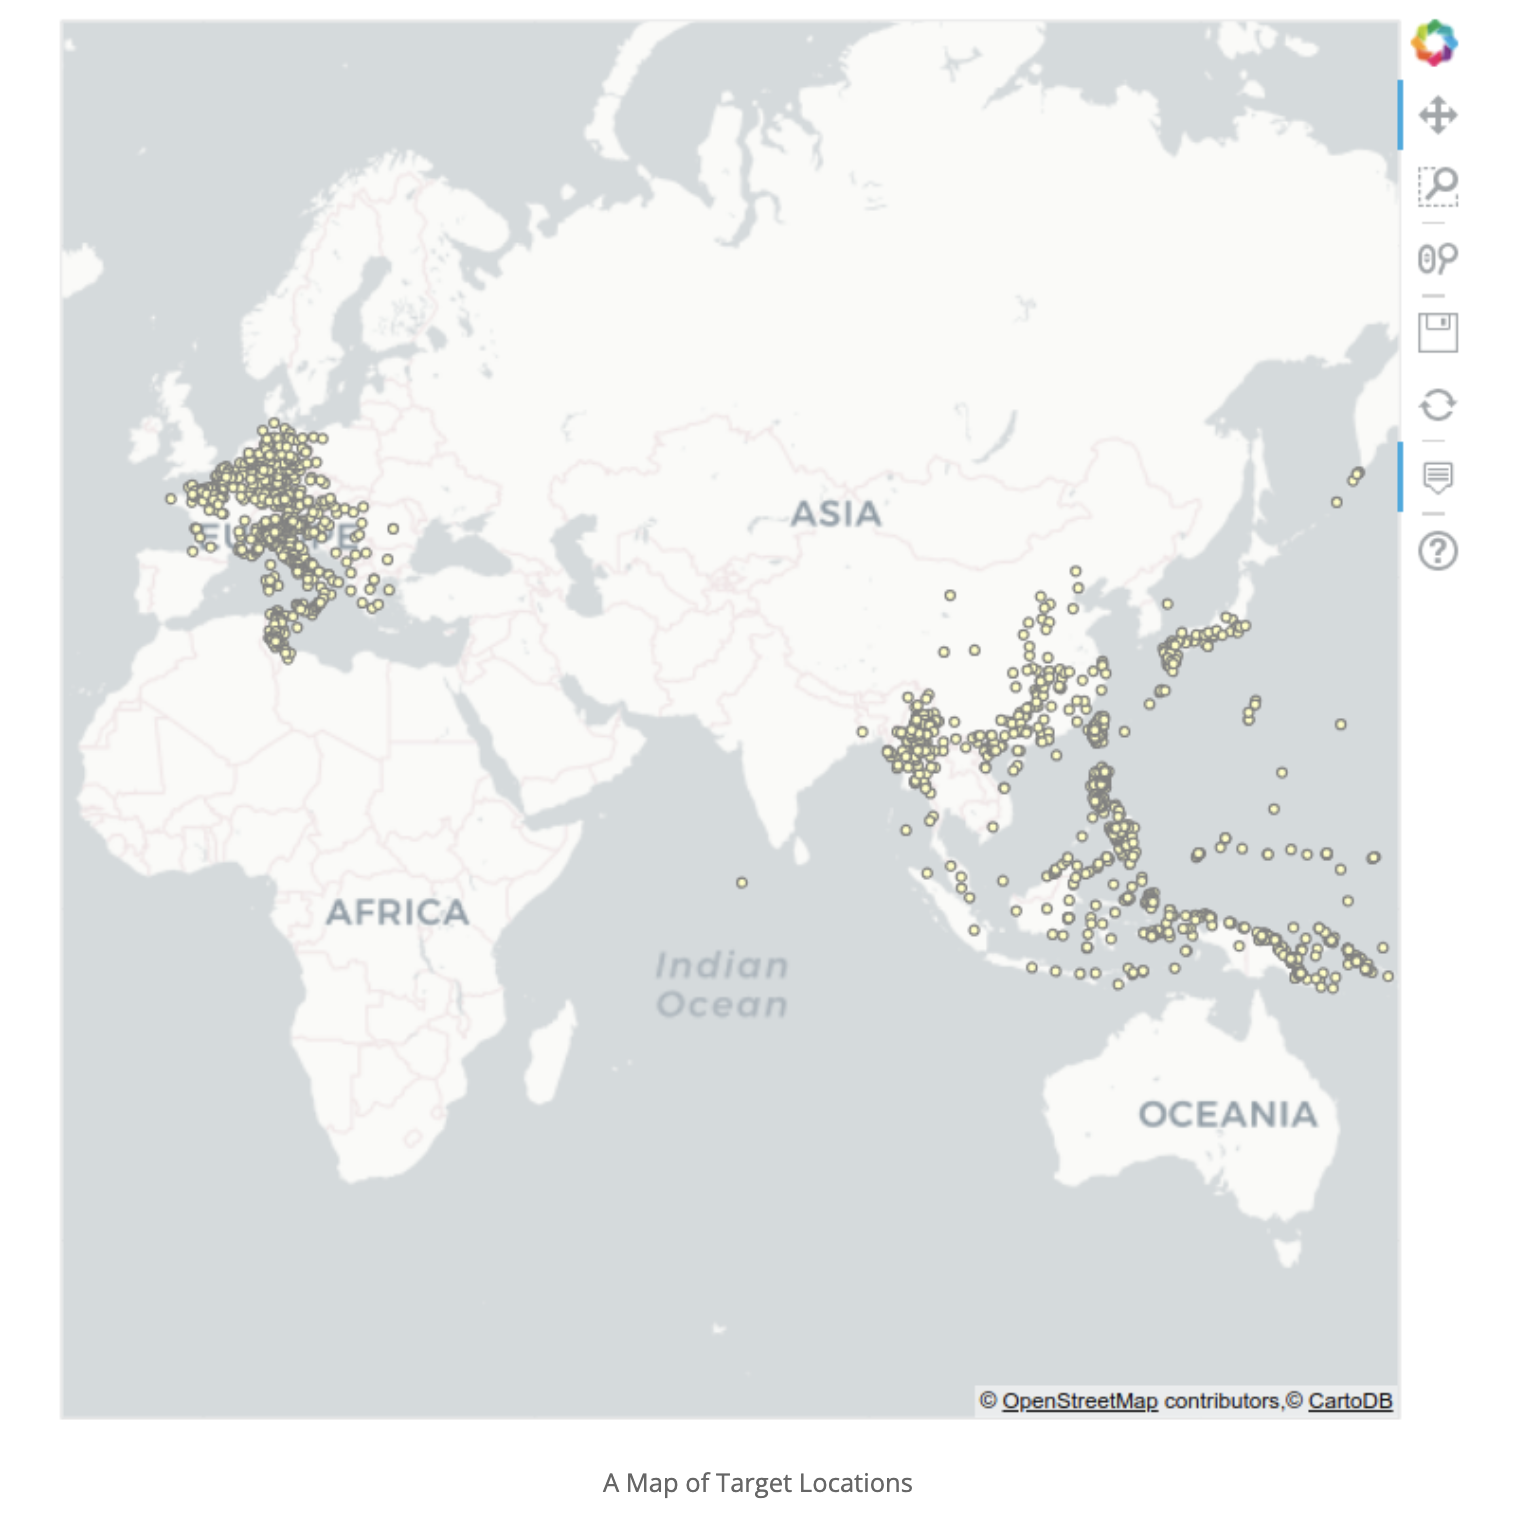